## Predicting Central Bank (CBK) Interest Rates based on Inflation Rates in Kenya

Visualizing Kenya's Central Bank Rates from 2000 to 2018. There was no data for the period 2000 to 2007 hence a flat line.

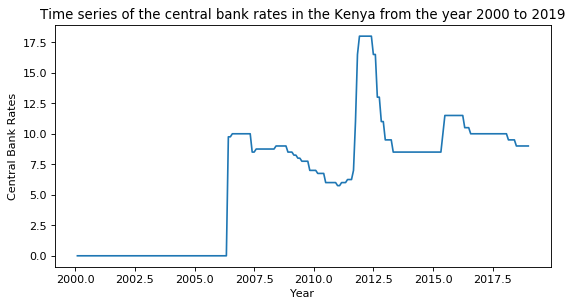

In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import array
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# CENTRAL BANK RATES

# central bank rates data
cbk_rates_data = pd.read_csv(
    'CentralBankRates.csv', header=0)

cbk_rates_data.interpolate(inplace=True)
cbk_rates_data.fillna('0', inplace=True)

cbk_rates_date = cbk_rates_data[103:]["YEAR"].astype(float)
cbk_rates_rate = cbk_rates_data[103:]["Central Bank Rate"].astype(float)

fig, ax = plt.subplots(figsize=(8,4),dpi=80)
plt.plot(cbk_rates_date, cbk_rates_rate)
plt.xlabel('Year')
plt.ylabel('Central Bank Rates')
plt.title('Time series of the central bank rates in the Kenya from the year 2000 to 2019')
plt.show()

# print(cbk_rates_rate)
# print(cbk_rates_date)
# print(cbk_rates_data.tail())
# print(gdp_data)
# print(inflation_data)

Visualizing Kenya's Inflation Rates from the year 2000 to 2008.

RangeIndex(start=0, stop=500, step=1)
Index(['Year', 'Month', 'Overall  CPI', 'Inflation Rate'], dtype='object')


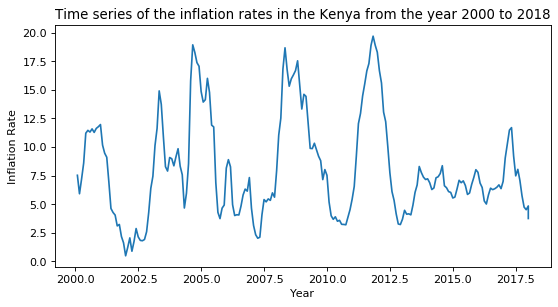

In [43]:
# INFLATION RATES

# inflation rates data
inflation_data = pd.read_csv(
    'InflationRates.csv', header=0)

inflation_data.interpolate(inplace=True)
inflation_data.fillna('-', inplace=True)
inflation_data = inflation_data.astype(str)

inflation_date = inflation_data[281:]["Year"].astype(float)
inflation_rate = inflation_data[281:]["Inflation Rate"].astype(float)
print(inflation_data.index)
print(inflation_data.columns)
# print(inflation_data.values[281])

# print(inflation_data[281:])
      
# print(inflation_rate)
fig, ax = plt.subplots(figsize=(8,4),dpi=80)
plt.plot(inflation_date, inflation_rate)

plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Time series of the inflation rates in the Kenya from the year 2000 to 2018')
plt.show()

Visualizing Kenya's GDP (Economic) growth from 2000 to 2018.

Float64Index([2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
              2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0, 2017.0, 2018.0],
             dtype='float64')
[0.59969539 3.7799065  0.54685953 2.93247555 5.10429978 5.90666608
 6.4724943  6.85072977 0.23228275 3.30693982 8.40569922 6.10826372
 4.56320913 5.87868057 5.35712564 5.71850713 5.8789493  4.86253822
 6.31978136]


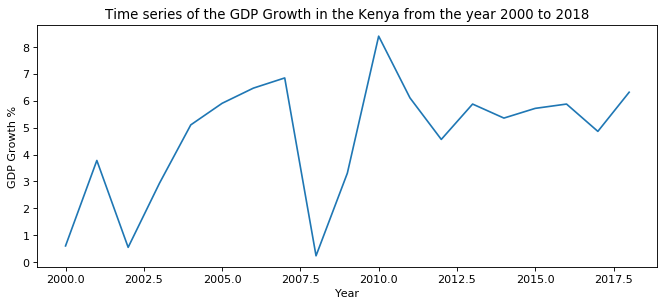

In [44]:
# CDP
# GDP data
gdp_data = pd.read_csv(
    'GDP_data_worldbank.csv', header=4)
gdp_data.interpolate(inplace=True)
gdp_data.fillna('-', inplace=True)
gdp_data = gdp_data.astype(str)
cols = ["Country Name"]
rows = ["Kenya"]
gdp_date = gdp_data[119:120]["Country Name"]
# gdp_growth = gdp_data.loc["Kenya":, :]

# print(gdp_data.index)
# print(gdp_data.columns[:10].append(gdp_data.columns[11]))
# print(gdp_data.values[119].size)
# print(gdp_date.index)
# print(gdp_growth)
gdp_2000_2019 = gdp_data.loc[119:119,['Country Name','2000', '2001', '2002',  '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
gdp_date = (gdp_data.columns[44:63]).astype(float)
gdp_rate = (gdp_data.values[119][44:63]).astype(float)
print(gdp_date)
print(gdp_rate)
fig, ax = plt.subplots(figsize=(10,4),dpi=80)
plt.plot(gdp_date, gdp_rate)
plt.xlabel('Year')
plt.ylabel('GDP Growth %')
plt.title('Time series of the GDP Growth in the Kenya from the year 2000 to 2018')
plt.show()

A comparative visualization of the various data (Inflation rates, CBK Interest rates and GDP Growth) in Kenya from 2000 to 2018.

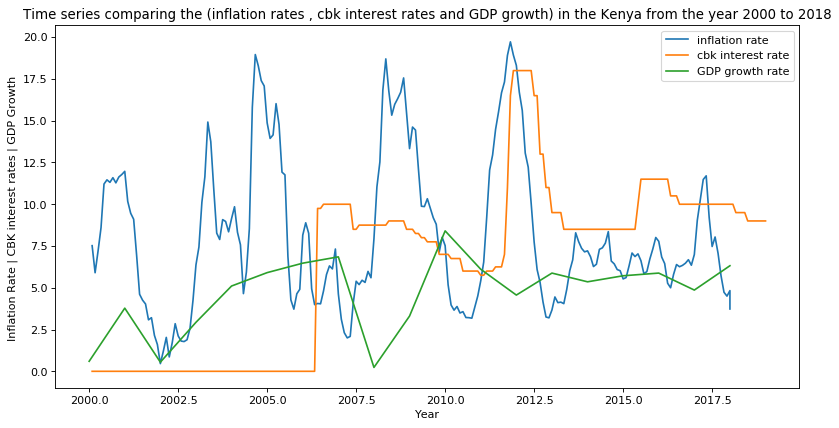

In [45]:
fig, ax = plt.subplots(figsize=(12,6),dpi=80)
plt.plot(inflation_date, inflation_rate, label="inflation rate")
plt.plot(cbk_rates_date, cbk_rates_rate, label="cbk interest rate")
plt.plot(gdp_date, gdp_rate, label="GDP growth rate")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Inflation Rate | CBK interest rates | GDP Growth ')
plt.title('Time series comparing the (inflation rates , cbk interest rates and GDP growth) in the Kenya from the year 2000 to 2018')
plt.show()

Inflation Rate vs CDK Interest rates

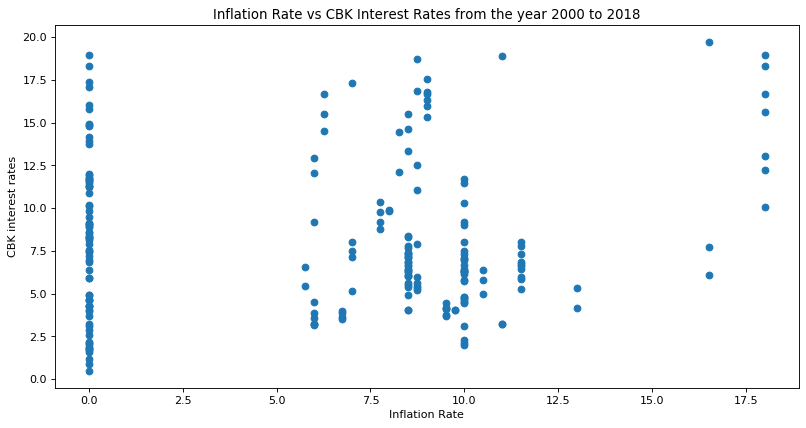

In [72]:
# dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
# plt.title('MinTemp vs MaxTemp')  
# plt.xlabel('MinTemp')  
# plt.ylabel('MaxTemp')  
# plt.show()
inflation_rate = inflation_rate[:219]
cbk_rates_rate = cbk_rates_rate[:219]
gdp_rate = gdp_rate[:219]

fig, ax = plt.subplots(figsize=(12,6),dpi=80)
plt.plot(cbk_rates_rate, inflation_rate, 'o')
# plt.legend()
plt.xlabel('Inflation Rate')
plt.ylabel('CBK interest rates')
plt.title('Inflation Rate vs CBK Interest Rates from the year 2000 to 2018')
plt.show()

Let's compute the Average Inflation Rate. Once we plot it we can observe that the Average Inflation Rate is Between Nearly 5 and 9. 

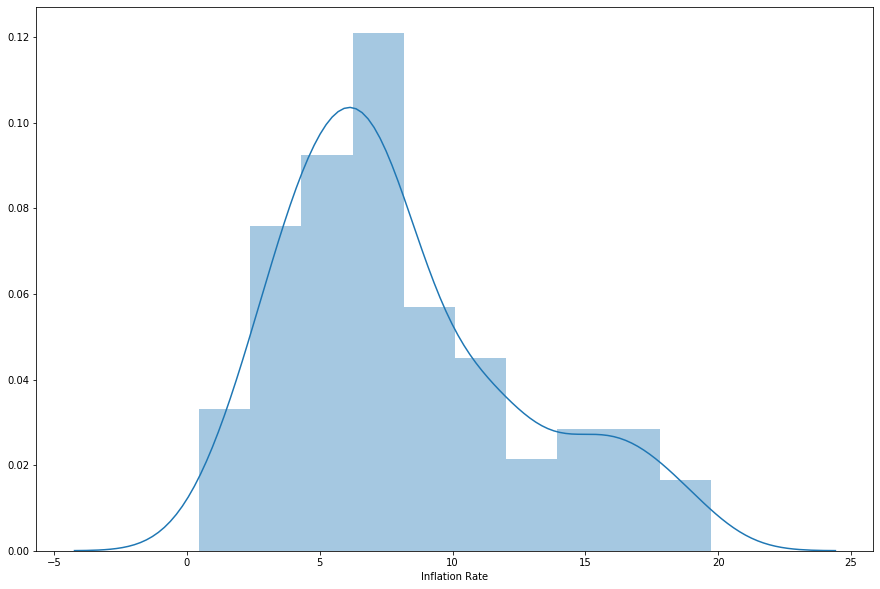

In [47]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(inflation_rate)

Next we plot the Average CBK Interest Rate. Once we plot it we can observe that the Average CBK Interest Rate is Between Nearly 6.5 and 12.5. 

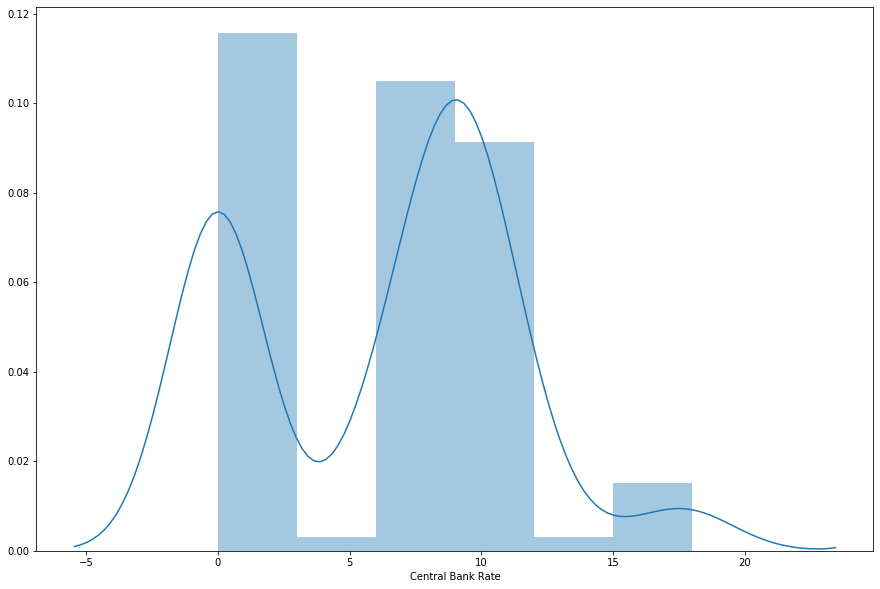

In [48]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(cbk_rates_rate)

Next step is to divide the data into “attributes” and “labels”. Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the CBK Interest Rate depending upon the Inflation Rate recorded. Therefore our attribute set will consist of the “InflationRate” column which is stored in the X variable, and the label will be the “CBKInterestRate” column which is stored in y variable.

In [56]:
X = inflation_rate.values.reshape(-1,1)
y = cbk_rates_rate.values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the `fit()` method along with our training data.

In [58]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, we execute the following code:

In [60]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[5.32841587]
[[0.11316781]]


The result is approximately `5.32841587` and `0.11316781` respectively.

This means that for every one unit of change in Inflation Rate, the change in the CBK Interest Rate is about `0.11%`.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, we execute the following code:

In [61]:
y_pred = regressor.predict(X_test)

Now we compare the actual output values for `X_test` with the predicted values, by executing the following code:

In [62]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,13.00,5.796931
1,0.00,5.887465
2,0.00,6.250733
3,8.50,6.009686
4,8.50,6.083245
5,18.00,7.400518
6,0.00,7.001036
7,11.00,5.696211
8,9.50,5.750532
9,6.00,6.793939


We can also visualize comparison result as a bar graph using the below code :
Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

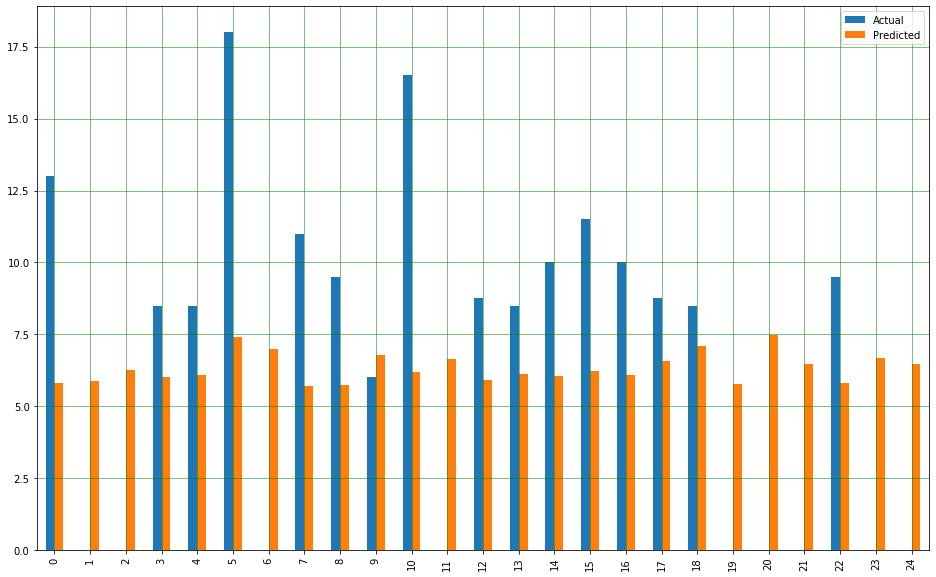

In [67]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

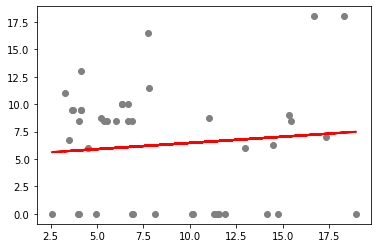

In [68]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:
- `Mean Absolute Error` (MAE) is the mean of the absolute value of the errors.
- `Mean Squared Error` (MSE) is the mean of the squared errors 
- `Root Mean Squared Error` (RMSE) is the square root of the mean of the squared errors

Let’s find the values for these metrics using our test data.

In [84]:
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error)  
print('Mean Squared Error:', mean_squared_error)  
print('Root Mean Squared Error:', root_mean_squared_error)

average_cbk_interest_rate =  np.average(cbk_rates_rate)
print('Average CBK Interest Rates: ', average_cbk_interest_rate)
print(str(int(root_mean_squared_error / average_cbk_interest_rate * 100)) + "%")

Mean Absolute Error: 4.662115741147718
Mean Squared Error: 28.7193214401251
Root Mean Squared Error: 5.359041093341709
Average CBK Interest Rates:  6.2271689497716896
86%


You can see that the value of root mean squared error is `5.36`, which is more than 86% of the mean value of the percentages of all the CBK interest rates i.e. `6.23`. This means that our algorithm was not very accurate but can still make reasonably good predictions.